In [3]:
# Import necessary tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

# Declare root path for accessing package
sys.path.append(os.path.abspath(os.path.join('..', '..')))

# import module
from src.data_manipulation.NPZer import NPZer
from src.data_manipulation.TRexDataCleaner import TRexDataCleaner
from src.data_manipulation.TRexImputer import TRexImputer
from src.turning_functions import turning_funcs

dataCleaner = TRexDataCleaner()

### Daphnia Movement Data Analysis

This code block performs the following steps:

1. **Load Data:** Reads faulty Daphnia movement data from a `.npz` file, containing time, X, and Y positions.
2. **Clean Data:** Removes discontinuities where velocity exceeds a threshold, returning cleaned data.
3. **Smoothing:** Applies a rolling average to smooth the trajectory data.
4. **Plotting:** Creates two subplots:
   - The first shows the trajectory of the Daphnia's movement in a dish.
   - The second displays the running sum of `dtheta`, the change in the Daphnia's turning angle over time.
5. **Display:** Plots the results with properly adjusted layout for visualization.


Faulty Data: 
              time          X         Y
0        0.000000  23.536650 -1.792803
1        0.016949  23.517750 -1.792841
2        0.033898  23.517750 -1.792841
3        0.050847  23.517750 -1.792841
4        0.067796  23.517750 -1.792841
...           ...        ...       ...
10817  183.338989  19.579285 -6.965172
10818  183.355927  19.569004 -6.989434
10819  183.372879  19.588287 -7.017863
10820  183.389832  19.577187 -7.083682
10821  183.406784  19.577187 -7.083682

[10822 rows x 3 columns]


c:\Users\jwright\Documents\GitHub\daphnia\src\data_manipulation\TRexDataCleaner.py:53: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  removedData = pd.concat([removedData, pd.DataFrame([data.iloc[f]])], ignore_index=True)


Cleaned Data: 
              time          X         Y
0        0.000000  23.536650 -1.792803
1        0.016949  23.517750 -1.792841
2        0.033898  23.517750 -1.792841
3        0.050847  23.517750 -1.792841
4        0.067796  23.517750 -1.792841
...           ...        ...       ...
10817  183.338989  19.579285 -6.965172
10818  183.355927  19.569004 -6.989434
10819  183.372879  19.588287 -7.017863
10820  183.389832  19.577187 -7.083682
10821  183.406784  19.577187 -7.083682

[10822 rows x 3 columns]
Removed Data: 
            time    X    Y
0      0.474576  inf -inf
1      0.525423  inf -inf
2      0.542372  inf -inf
3      0.559322  inf -inf
4      0.593220  inf -inf
..          ...  ...  ...
595  160.898300  inf -inf
596  160.915253  inf -inf
597  161.084747  inf -inf
598  161.101700  inf -inf
599  161.118637  inf -inf

[600 rows x 3 columns]
running sum


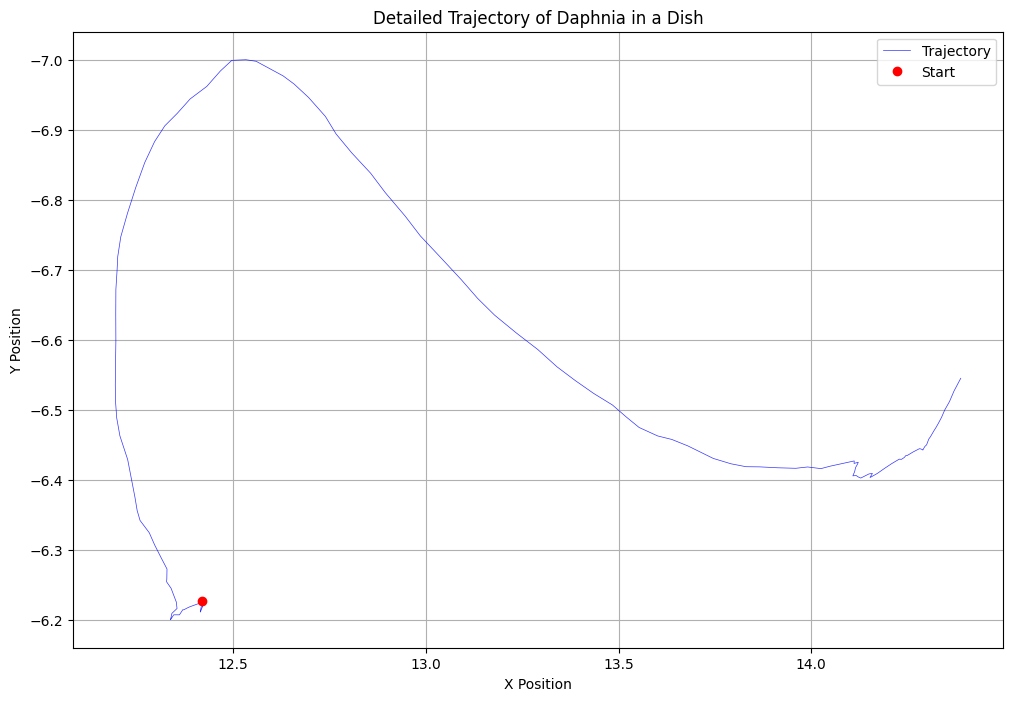

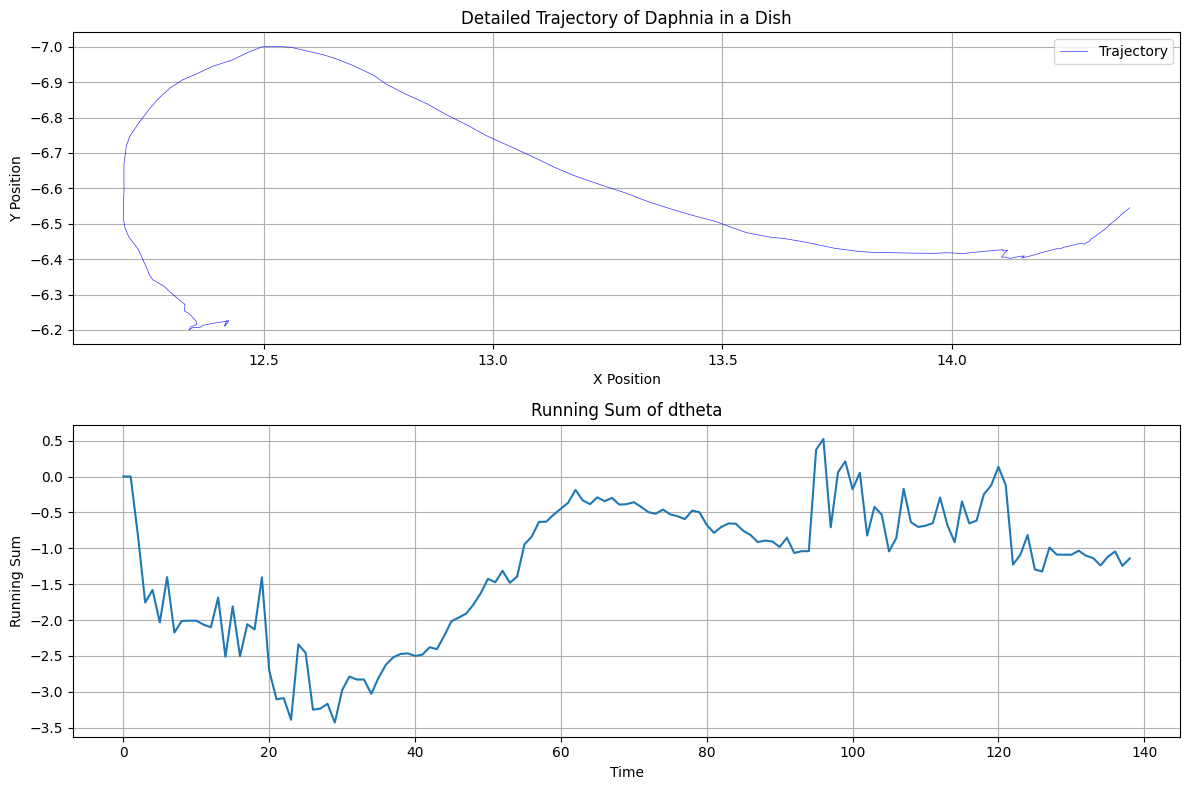

In [8]:
# Load data
faultyData = NPZer.pandafy(source_dir=r'C:\Users\jwright\Documents\GitHub\daphnia\data\npz_file\single_7_9_fish1.MP4_fish0.npz', invertY=True, params=['time', 'X', 'Y'])
print(f"Faulty Data: \n {faultyData}")

cleanedData, removedData = dataCleaner.renderDiscontinuities(data=faultyData, vmax=50)
print("Cleaned Data: \n", cleanedData)
print("Removed Data: \n", removedData)

smoothed = turning_funcs.rolling_avg(cleanedData, 10)
segmented_data = smoothed[4060:4200]
return_plot = turning_funcs.plot_trajectory(segmented_data, return_figure = True)


sum_1 = turning_funcs.running_theta_sum(segmented_data)



#make a figure with 2 subplots

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

#plot the trajectory
ax1.plot(segmented_data['X'], segmented_data['Y'], label='Trajectory', color='blue', linewidth=0.5, linestyle='-', alpha=0.8)
ax1.set_title('Detailed Trajectory of Daphnia in a Dish')
ax1.set_xlabel('X Position')
ax1.set_ylabel('Y Position')
ax1.invert_yaxis()
ax1.legend()
ax1.grid(True)

#plot the running sum
ax2.plot(sum_1)
ax2.set_title('Running Sum of dtheta')
ax2.set_xlabel('Time')
ax2.set_ylabel('Running Sum')
ax2.grid(True)

plt.tight_layout()
plt.show()

## Visually iterating through continuous segments in a daphnia file:



In [ ]:
turning_funcs.turn_segment_visualizer(faultyData, smoothing_window=50, turn_window = 10, min_segment_length=200 )